In [140]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from pandas.plotting import scatter_matrix
%matplotlib inline

In [121]:
wine_dataset = pd.read_csv('wine.csv')
wine_dataset

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [77]:
customer_dataset = pd.read_csv('customer.csv')
customer_dataset

,ID,Gender_Code,Region,Income,Spending
0,1,Female,Rural,20.0,15.0
1,2,Male,Rural,5.0,12.0
2,3,Female,Urban,28.0,18.0
3,4,Male,Urban,40.0,10.0
4,5,Male,Urban,42.0,9.0
...,...,...,...,...,...
1108,1109,Female,Urban,33.0,16.0
1109,1110,Male,Urban,48.0,7.0
1110,1111,Male,Urban,31.0,16.0
1111,1112,Male,Urban,50.0,14.0


In [79]:
iris_dataset = pd.read_csv('Iris.csv')
x = iris_dataset.drop(['Id', 'Species'], axis=1, errors='ignore')
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Kmeans Clustering on Wine Dataset

In [116]:
sc = StandardScaler()
wine_dataset = sc.fit_transform(wine_dataset)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


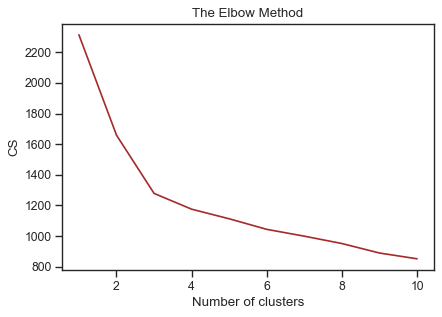

In [117]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(wine_dataset)
    cs.append(kmeans.inertia_)

plt.figure(figsize=(6, 4), dpi=80)
plt.plot(range(1, 11), cs, color='brown')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()


In [118]:
kmeans = KMeans(n_clusters=3, init='k-means++',random_state=42)
y = kmeans.fit_predict(wine_dataset)
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 0 2 2 1 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


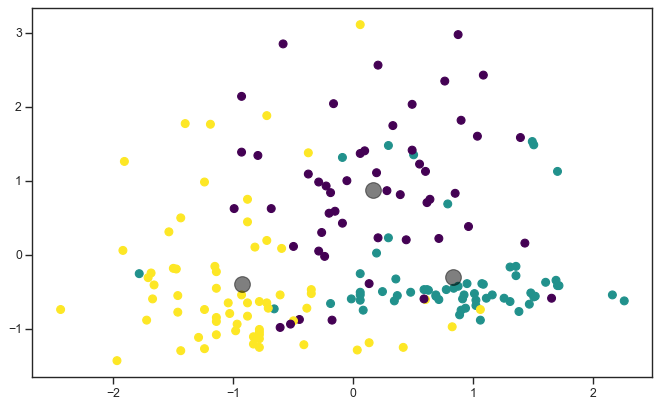

In [119]:
plt.figure(figsize=(10, 6), dpi=80)
plt.scatter(wine_dataset[:, 0], wine_dataset[:, 1], c=y, s=50, cmap='viridis')

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

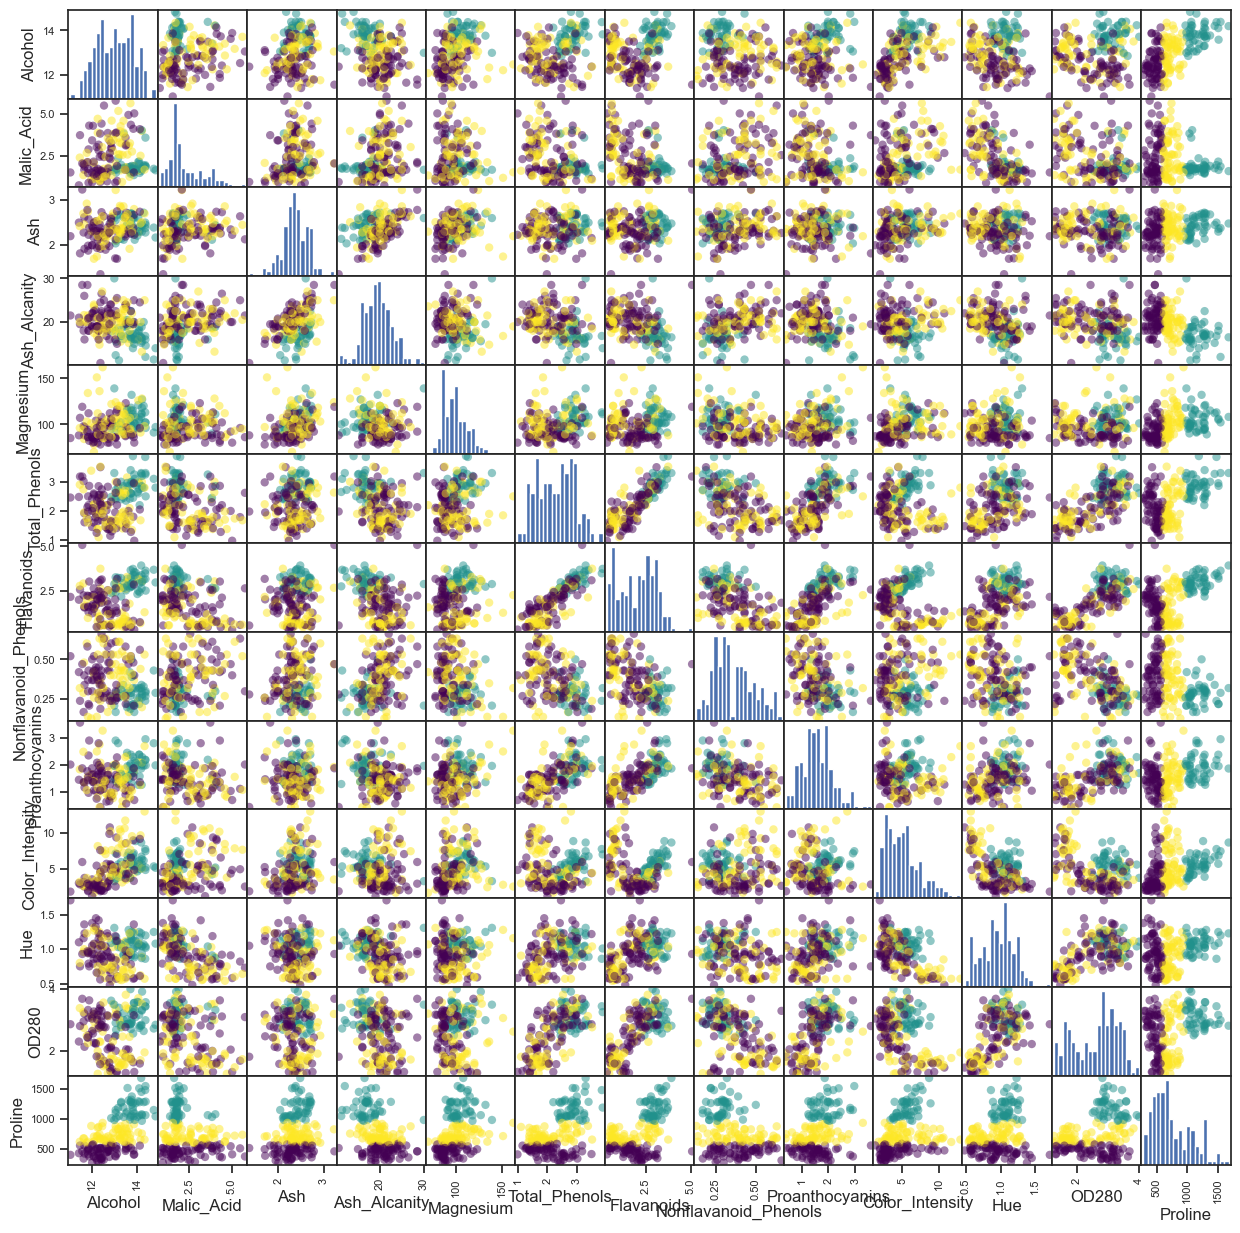

In [144]:
X = wine_dataset.values

# Perform k-means clustering
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Create a DataFrame with the selected attributes and the target variable
selected_attributes = wine_dataset.columns
df_selected = wine_dataset[selected_attributes]

# Create a scatter matrix
scatter_matrix(df_selected, c=y_kmeans, cmap='viridis', figsize=(15, 15), marker='o', hist_kwds={'bins': 20})
plt.show()


## Hierarchical Clustering on Customers

In [49]:
customer_dataset['Gender_Code'] = customer_dataset['Gender_Code'].replace({"Female":1,"Male":0})
customer_dataset['Region']= customer_dataset['Region'].replace({"Urban":1, "Rural":0})

In [51]:
customer_dataset = customer_dataset.fillna(customer_dataset.mean().round(0))

In [52]:
#Taking only Region, Income and Spending
customer_dataset = customer_dataset.iloc[:,2:]
x = customer_dataset.values

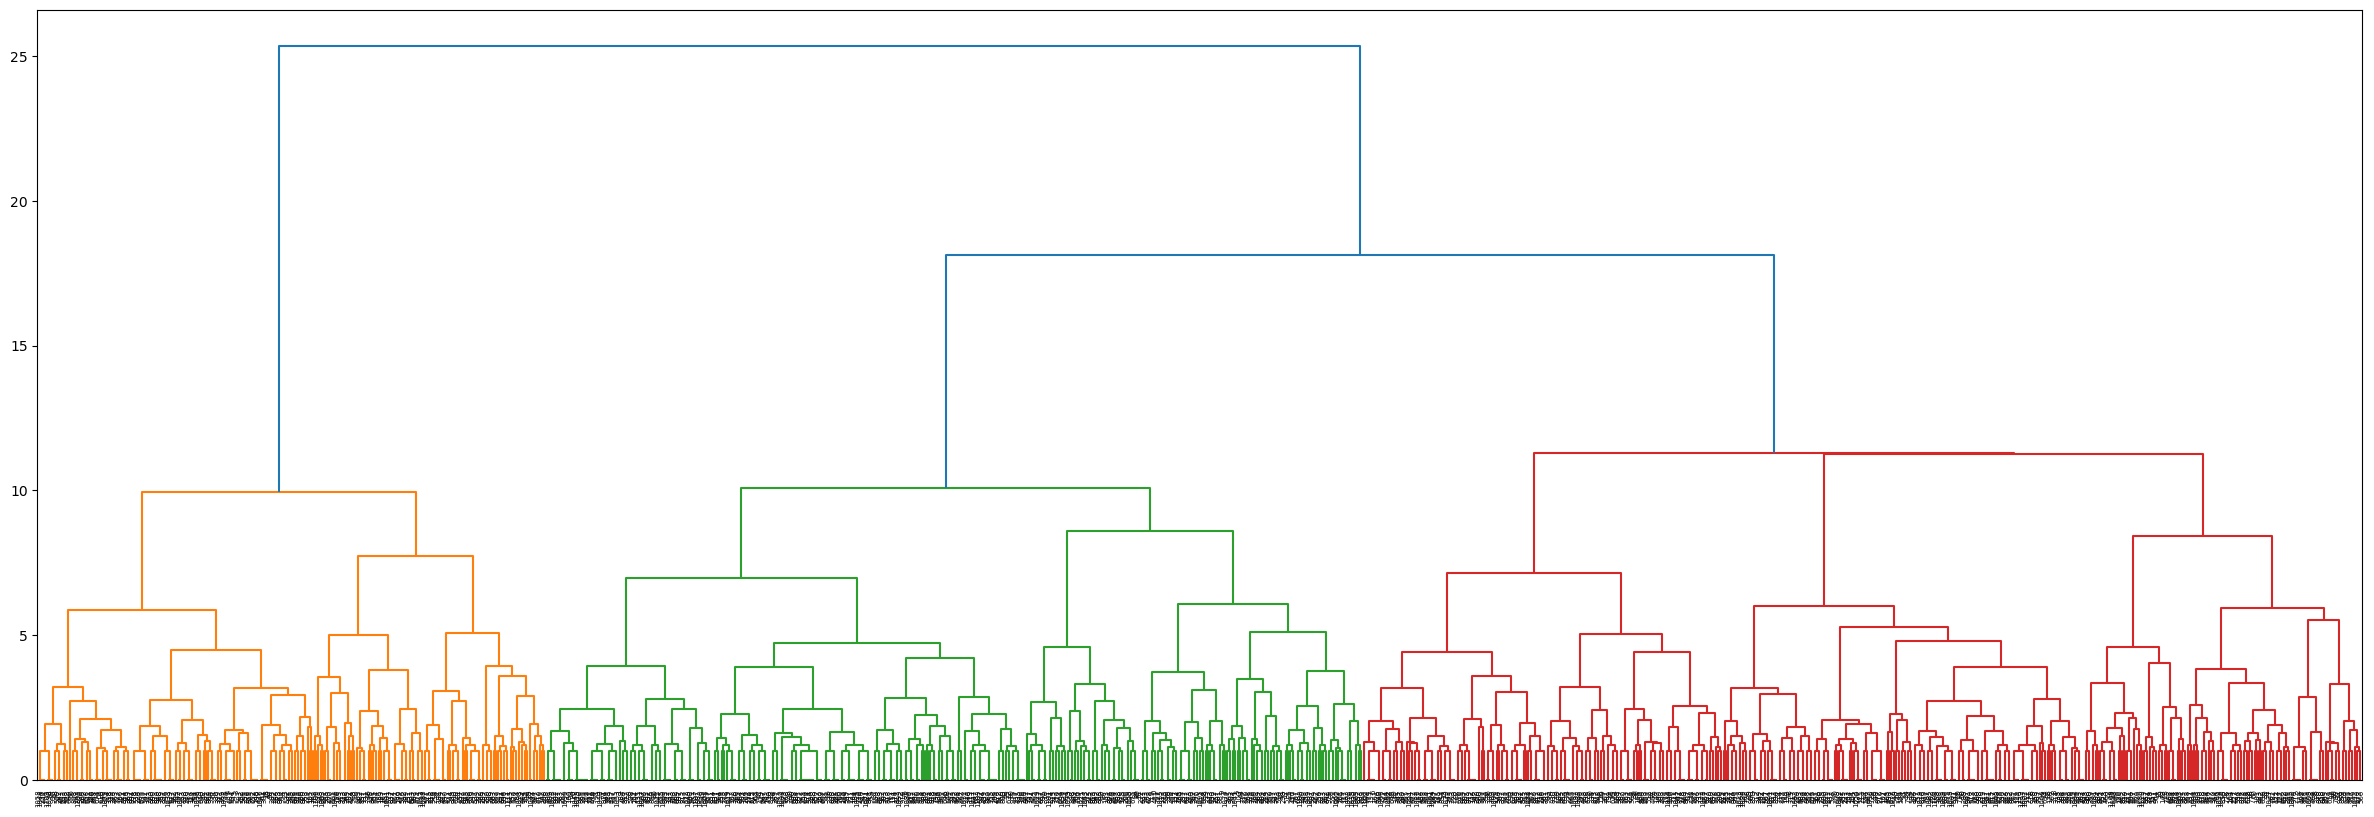

In [59]:
plt.figure(figsize=(30,10))
dendrogram(linkage(x, method='average'))
plt.show()

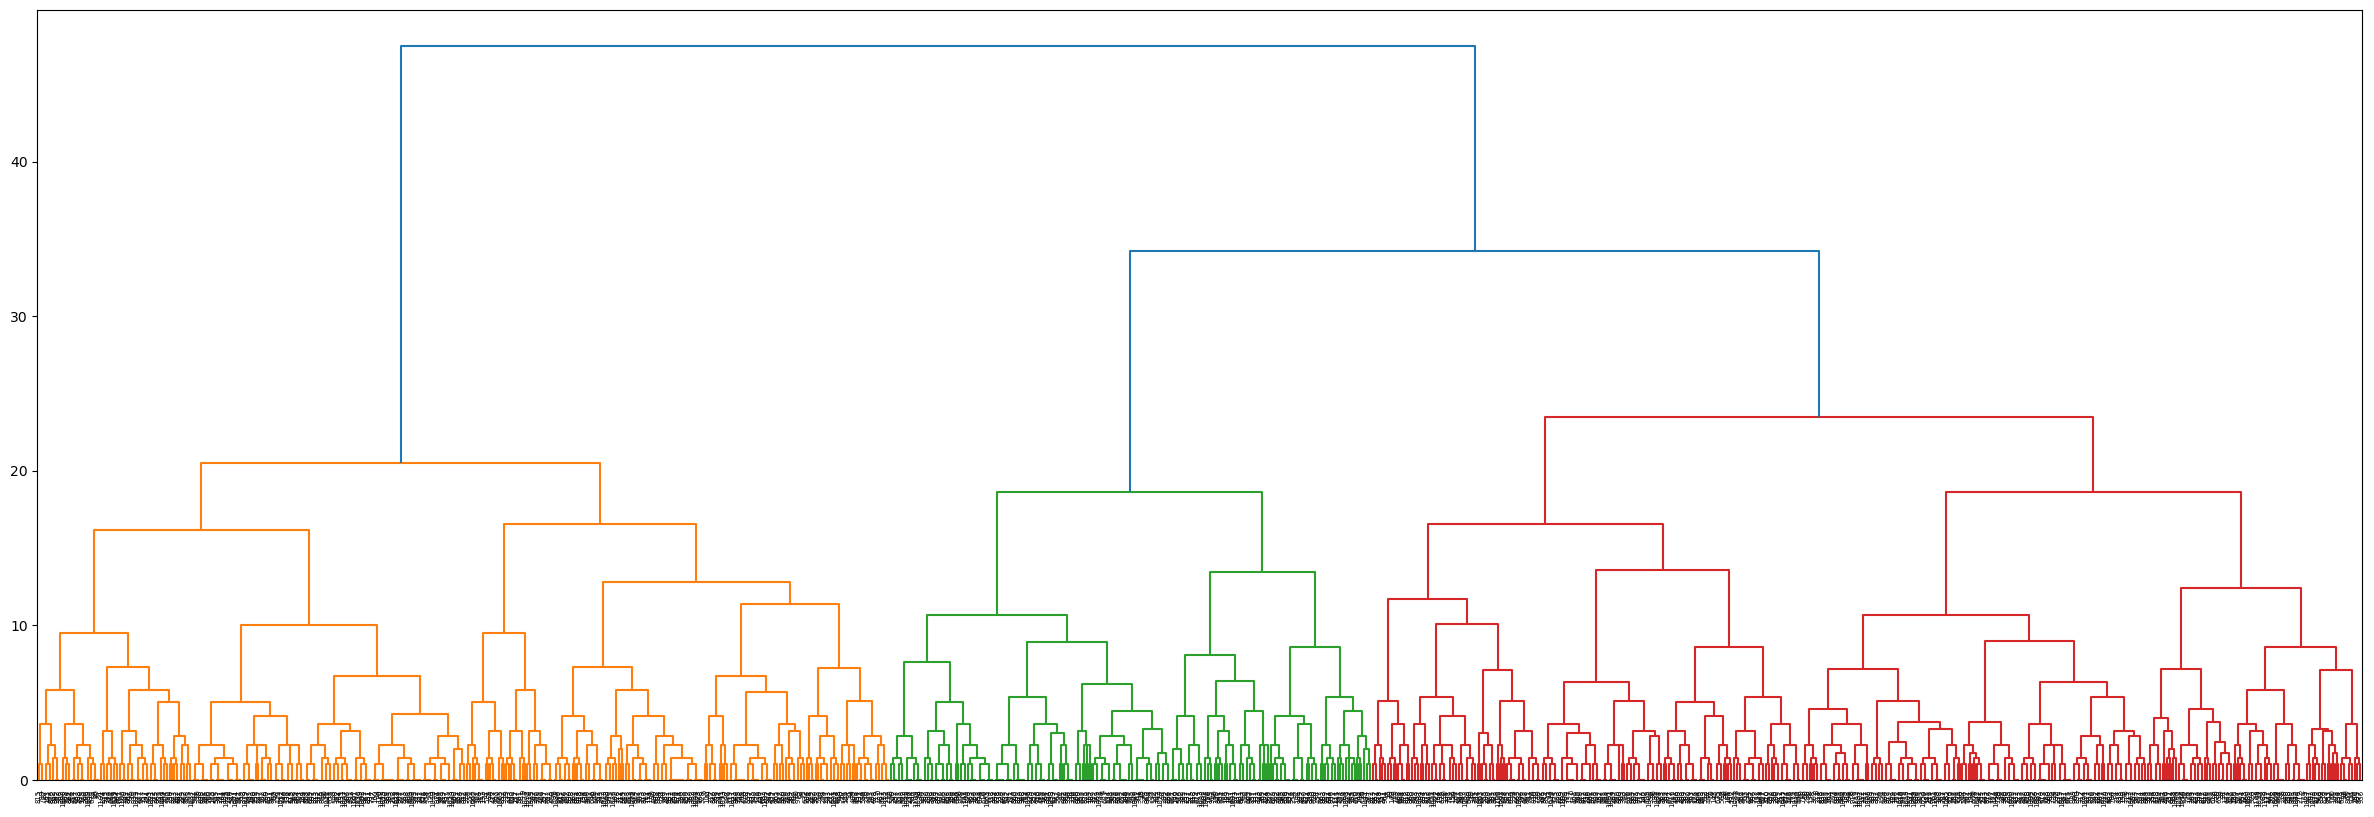

In [57]:
plt.figure(figsize=(30,10))
dendrogram(linkage(x, method='complete'))
plt.show()

In [60]:
clusters = cut_tree(linkage(x, method='complete'), n_clusters=3)
customer_dataset['Cluster'] = clusters.flatten()
customer_dataset

,Region,Income,Spending,Cluster
0,0.0,20.0,15.0,0
1,0.0,5.0,12.0,0
2,1.0,28.0,18.0,1
3,1.0,40.0,10.0,1
4,1.0,42.0,9.0,2
...,...,...,...,...
1108,1.0,33.0,16.0,1
1109,1.0,48.0,7.0,2
1110,1.0,31.0,16.0,1
1111,1.0,50.0,14.0,2


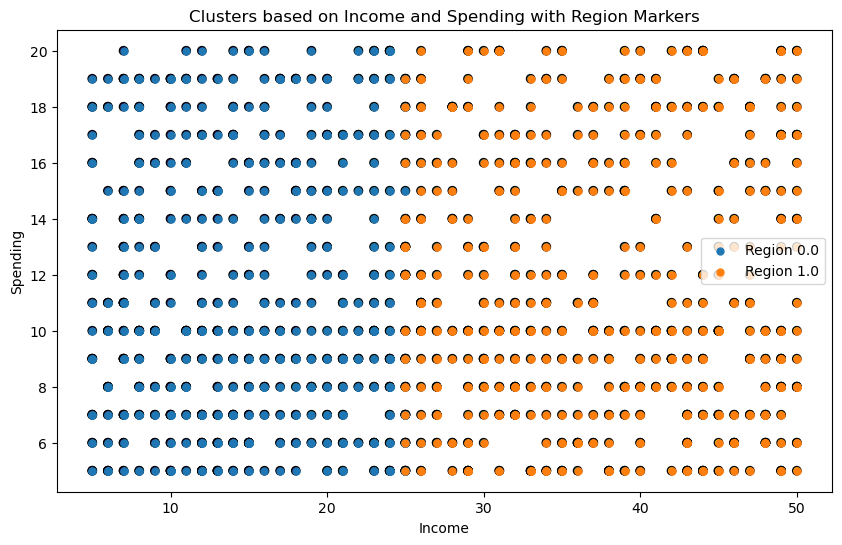

In [73]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(customer_dataset['Income'], customer_dataset['Spending'],
                      c=customer_dataset['Cluster'], cmap='viridis', marker='o', edgecolors='black')

# Add different markers for different regions
for reg in customer_dataset['Region'].unique():
    subset = customer_dataset[customer_dataset['Region'] == reg]
    plt.scatter(subset['Income'], subset['Spending'], label=f'Region {reg}', marker='.', s=100)

plt.xlabel('Income')
plt.ylabel('Spending')
plt.title('Clusters based on Income and Spending with Region Markers')
plt.legend()
plt.show()

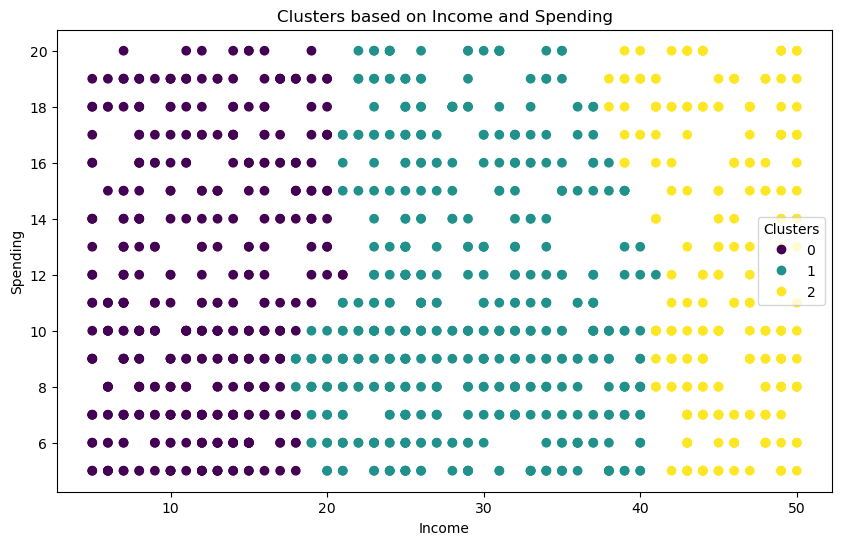

In [63]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(customer_dataset['Income'], customer_dataset['Spending'], c=customer_dataset['Cluster'], cmap='viridis')
plt.xlabel('Income')
plt.ylabel('Spending')
plt.title('Clusters based on Income and Spending')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.show()

## DBSCAN Algorithm on Iris Dataset

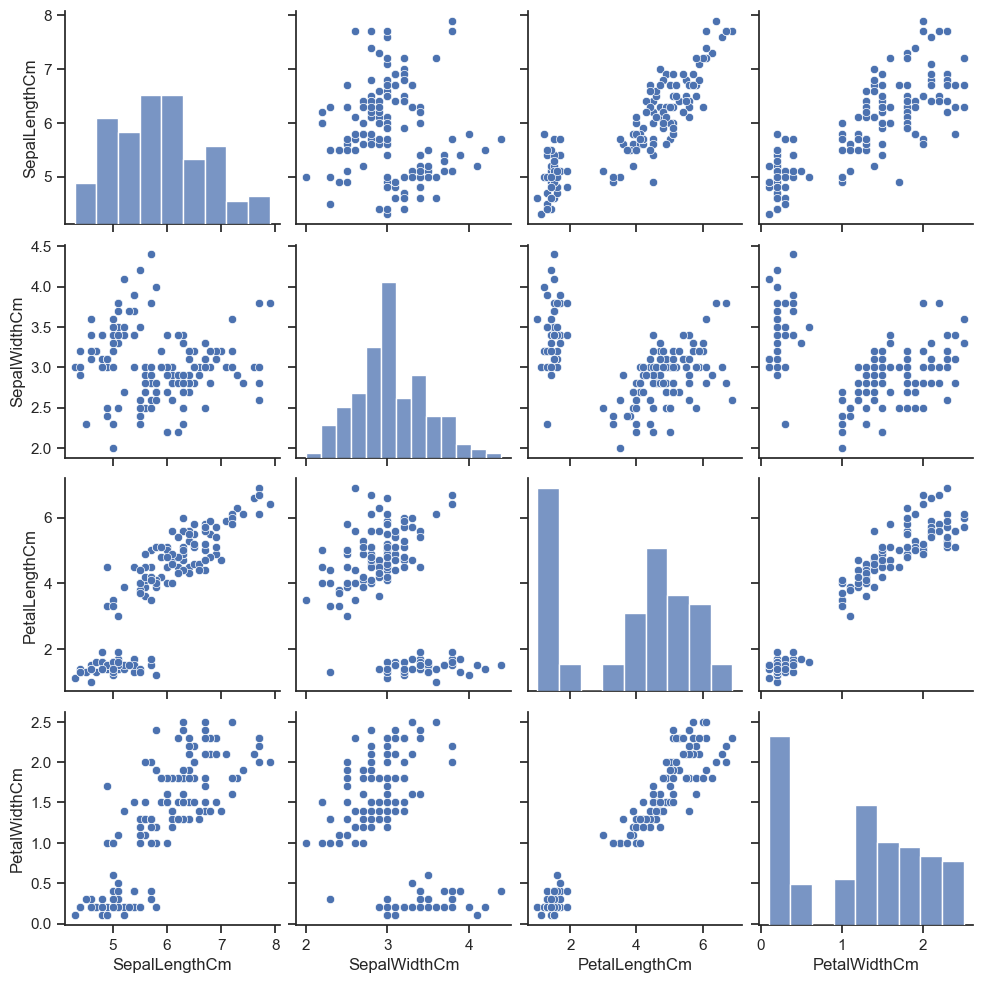

In [80]:
sns.set(style="ticks")
sns.pairplot(x, markers="o", palette="viridis")
plt.show()

In [113]:
dbscan = DBSCAN(eps=0.6, min_samples=5)
x['Cluster'] = dbscan.fit_predict(x)

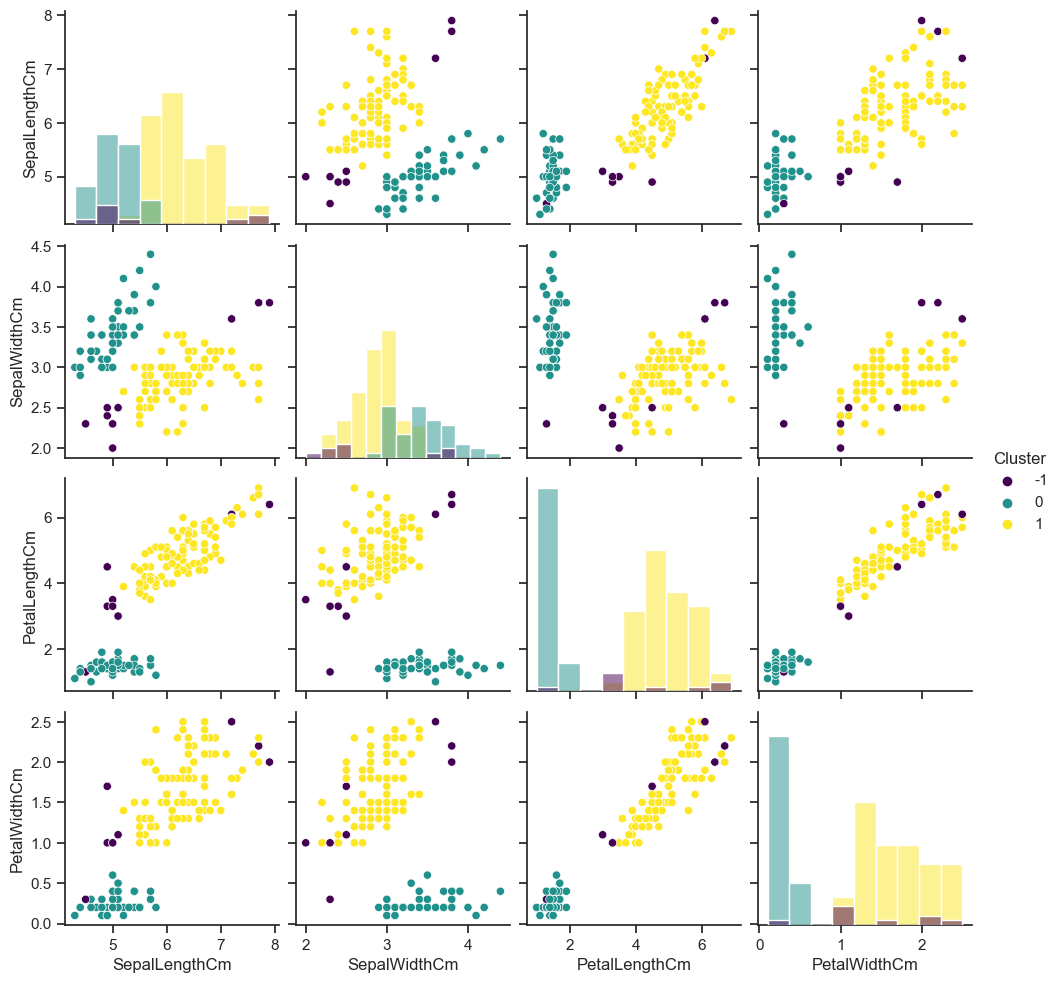

In [114]:
# Visualize clusters on pair plots
sns.set(style="ticks")
sns.pairplot(x, hue='Cluster', markers="o", palette="viridis", diag_kind='hist')
plt.show()